In [100]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Especificar columnas
relevant_columns = ['SKU','Tienda','Categoria','CLASE','Sem','Existencia','fiDesplazamiento','VentaPromedio','Y_Faltante','Predicción_Ago']
num_columns = ['Existencia','fiDesplazamiento','VentaPromedio']
cat_columns = ['SKU','Tienda','Categoria','CLASE','Sem','Predicción_Ago']
target = ['Y_Faltante']

In [102]:
dtype = {'SKU':'object','FORMATO':'object','REGION':'object','Tienda':'object','Categoria':'object','Proveedor':'object','CLASE':'object','SCLASE':'object','Mes':'object','DiaSem':'object','Sem':'object','Existencia':'float','fiDesplazamiento':'float',
\
'VentaPromedio':'float','Y_Faltante':'int','Predicción_Ago':'int','Ago_Predicción':'int'}

In [103]:
# Abrir el archivo
file = 'chedrauicd.csv'
data = pd.read_csv(file, header=0,low_memory=False, usecols=relevant_columns,dtype=dtype)
print('rows:', data.shape[0], ' columns:', data.shape[1])

rows: 1294195  columns: 10


In [104]:
faltante_real = data['Y_Faltante']
faltante_predicho = data['Predicción_Ago']
verdaderos_positivos = (faltante_real + faltante_predicho) % 2 

In [105]:
faltante_real.value_counts()

0    1132678
1     161517
Name: Y_Faltante, dtype: int64

In [106]:
faltante_predicho.value_counts()

0    1139674
1     154521
Name: Predicción_Ago, dtype: int64

In [107]:
verdaderos_positivos.value_counts()

0    1264203
1      29992
dtype: int64

yes %: 2.3174251175441105- no %: 97.68257488245588


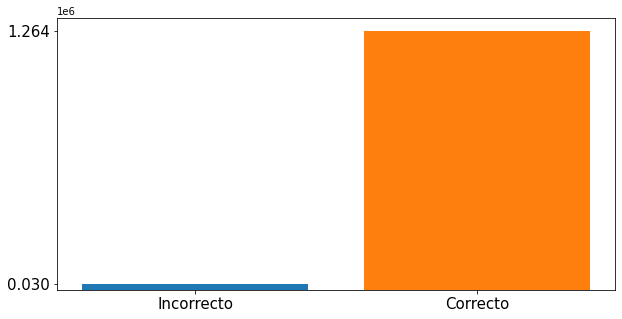

In [108]:
# Revisamos (de nuevo) la proporción de datos
target = verdaderos_positivos
yes = target[target == 1].count()
no = target[target == 0].count()
print('yes %: ' + str(yes/len(target)*100) + '- no %: ' \
        + str(no/len(target)*100))


fig, ax = plt.subplots(figsize=(10,5))
plt.bar("Incorrecto", yes)
plt.bar("Correcto", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()